In [109]:
import os

if os.path.exists('requirements.txt'):
    !pip3 install -r requirements.txt
else:
    !pip3 install pandas seaborn scikit-learn
    !pip3 freeze > requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [111]:
df = pd.read_csv('./data/train.csv')
df.sample(20)

datetime  season  holiday  workingday  weather   temp  \
539    2011-02-05 15:00:00       1        0           0        3   9.02   
10788  2012-12-15 22:00:00       4        0           0        1  14.76   
2760   2011-07-03 22:00:00       3        0           0        2  27.06   
7238   2012-04-19 23:00:00       2        0           1        1  20.50   
5613   2012-01-09 00:00:00       1        0           1        1   9.84   
9549   2012-10-02 06:00:00       4        0           1        3  23.78   
4650   2011-11-06 20:00:00       4        0           0        1  14.76   
7372   2012-05-06 13:00:00       2        0           0        2  24.60   
10246  2012-11-12 08:00:00       4        1           0        1  17.22   
9400   2012-09-15 01:00:00       3        0           0        1  24.60   
9029   2012-08-18 14:00:00       3        0           0        1  31.16   
9832   2012-10-14 01:00:00       4        0           0        1  17.22   
3933   2011-09-14 22:00:00       3        0           1        2  27.06   
5690   2012-01-12 06:00:00       1        0           1        3  14.76   
9327   2012-09-12 00:00:00       3        0           1        1  21.32   
4116   2011-10-03 13:00:00       4        0           1        3  17.22   
5139   2011-12-08 05:00:00       4        0           1        1   9.02   
3166   2011-08-01 20:00:00       3        0           1        1  29.52   
8605   2012-07-19 22:00:00       3        0           1        3  27.06   
1653   2011-04-14 19:00:00       2        0           1        1  22.14   

        atemp  humidity  windspeed  casual  registered  count  
539    13.635       100     0.0000      11          49     60  
10788  17.425        62    12.9980      22         134    156  
2760   30.305        78     7.0015      69          93    162  
7238   24.240        63     7.0015      20         124    144  
5613   11.365        60    15.0013       3          12     15  
9549   27.275        83     7.0015       3         176    179  
4650   18.180        81     7.0015      16         100    116  
7372   30.305        64     0.0000     197         368    565  
10246  21.210        82    11.0014      50         490    540  
9400   29.545        73     0.0000       8         101    109  
9029   33.335        37    19.0012     242         356    598  
9832   21.210        77    19.0012      16          96    112  
3933   31.060        65     8.9981      20         140    160  
5690   17.425        93     8.9981       1          88     89  
9327   25.000        72     7.0015       8          41     49  
4116   21.210        67    11.0014      16         102    118  
5139   10.605        64    15.0013       0          12     12  
3166   34.090        62    15.0013      49         256    305  
8605   29.545        89    16.9979       6          62     68  
1653   25.760        32     0.0000      37         222    259

In [112]:
cols_to_drop = ['casual', 'registered']
df = df.drop(cols_to_drop, axis=1)
df.sample(20)

datetime  season  holiday  workingday  weather   temp  \
10428  2012-11-19 22:00:00       4        0           1        1  13.94   
1668   2011-04-15 10:00:00       2        1           0        1  20.50   
2823   2011-07-06 13:00:00       3        0           1        2  30.34   
2672   2011-06-19 06:00:00       2        0           0        2  27.06   
10639  2012-12-09 17:00:00       4        0           0        3  14.76   
9004   2012-08-17 13:00:00       3        0           1        1  34.44   
10588  2012-12-07 14:00:00       4        0           1        2  14.76   
2471   2011-06-10 21:00:00       2        0           1        1  31.16   
9181   2012-09-05 22:00:00       3        0           1        1  29.52   
6512   2012-03-08 14:00:00       1        0           1        2  25.42   
10101  2012-11-06 06:00:00       4        0           1        1   9.02   
8796   2012-08-08 21:00:00       3        0           1        1  30.34   
5048   2011-12-04 10:00:00       4        0           0        1  13.12   
472    2011-02-02 18:00:00       1        0           1        1  13.94   
7542   2012-05-13 15:00:00       2        0           0        1  29.52   
1419   2011-04-05 00:00:00       2        0           1        1  25.42   
7571   2012-05-14 20:00:00       2        0           1        2  23.78   
8483   2012-07-14 20:00:00       3        0           0        1  29.52   
3076   2011-07-17 02:00:00       3        0           0        1  26.24   
3151   2011-08-01 05:00:00       3        0           1        1  27.06   

        atemp  humidity  windspeed  count  
10428  17.425        66     7.0015    113  
1668   24.240        55    12.9980    122  
2823   34.850        70     7.0015    140  
2672   30.305        78    11.0014     33  
10639  17.425        93     8.9981    229  
9004   12.120        36    26.0027    357  
10588  17.425        71    11.0014    215  
2471   36.365        66     8.9981    218  
9181   34.850        79     0.0000    219  
6512   31.060        43    43.0006    203  
10101  11.365        69     8.9981    149  
8796   34.850        66     7.0015    381  
5048   16.665        81     8.9981    216  
472    14.395        42    36.9974    182  
7542   32.575        45    23.9994    499  
1419   31.060        50     7.0015     22  
7571   27.275        88    12.9980    189  
8483   35.605        84     6.0032    356  
3076   30.305        69    15.0013     94  
3151   30.305        83     7.0015     26

In [113]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

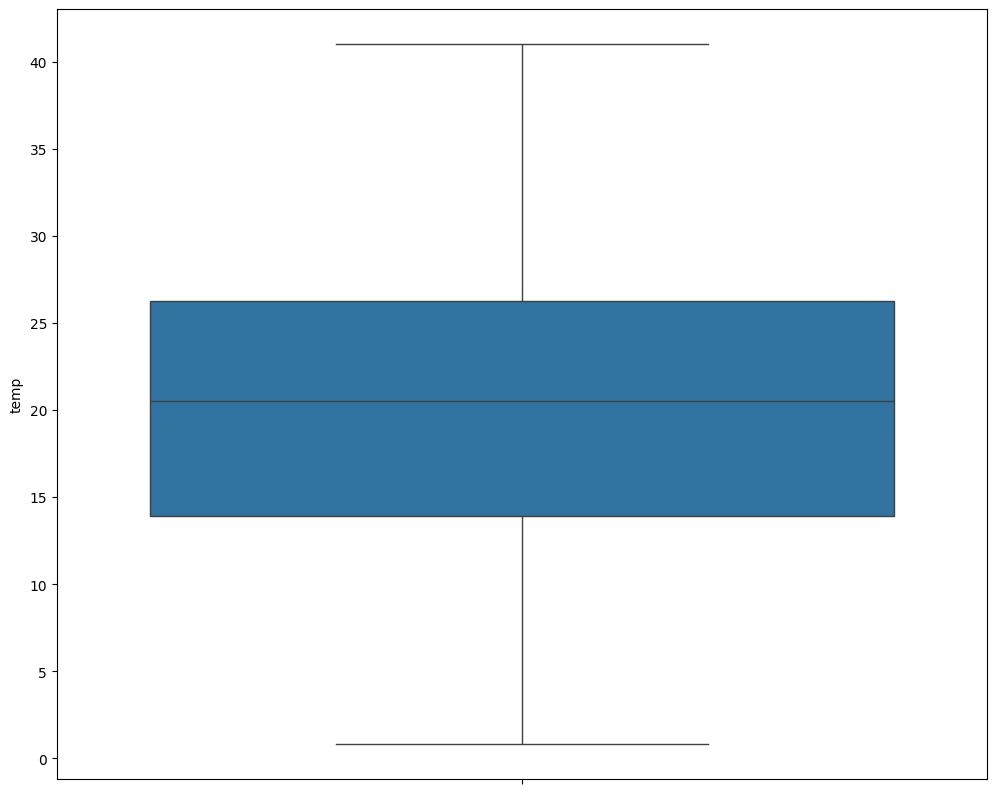

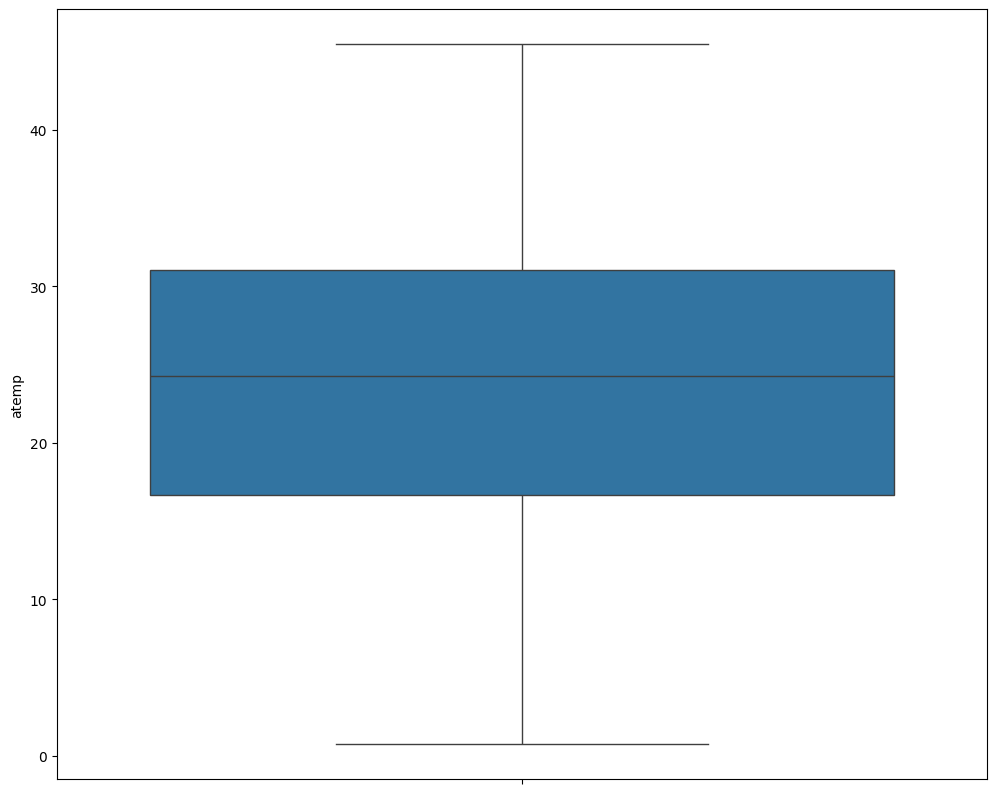

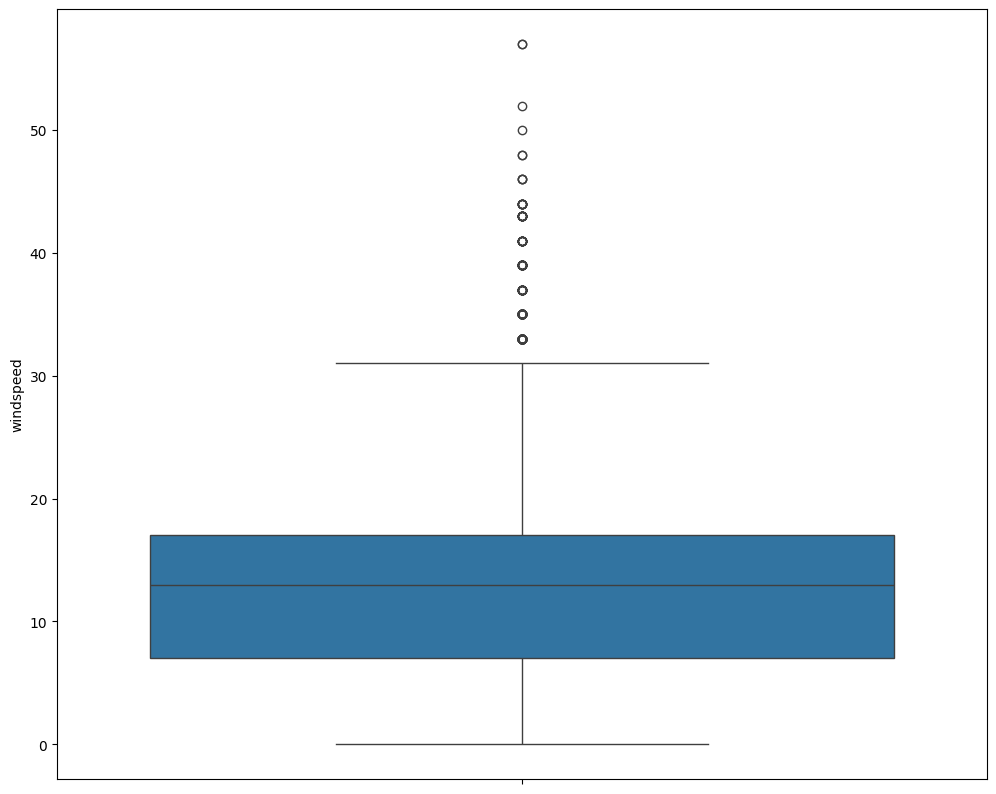

In [114]:
def plot_boxplot(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 10))
        sns.boxplot(df[col])
        plt.show()

decimal_cols = list(df.select_dtypes(include=['float64']).columns)

plot_boxplot(df, decimal_cols)

In [115]:
def remove_outliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.copy(deep=True)[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [116]:
def format_dates(df: pd.DataFrame, col: str) -> pd.DataFrame:
    df[col] = pd.to_datetime(df[col])
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['hour'] = df[col].dt.hour
    df = df.drop(columns=[col])
    return df.copy(deep=True)

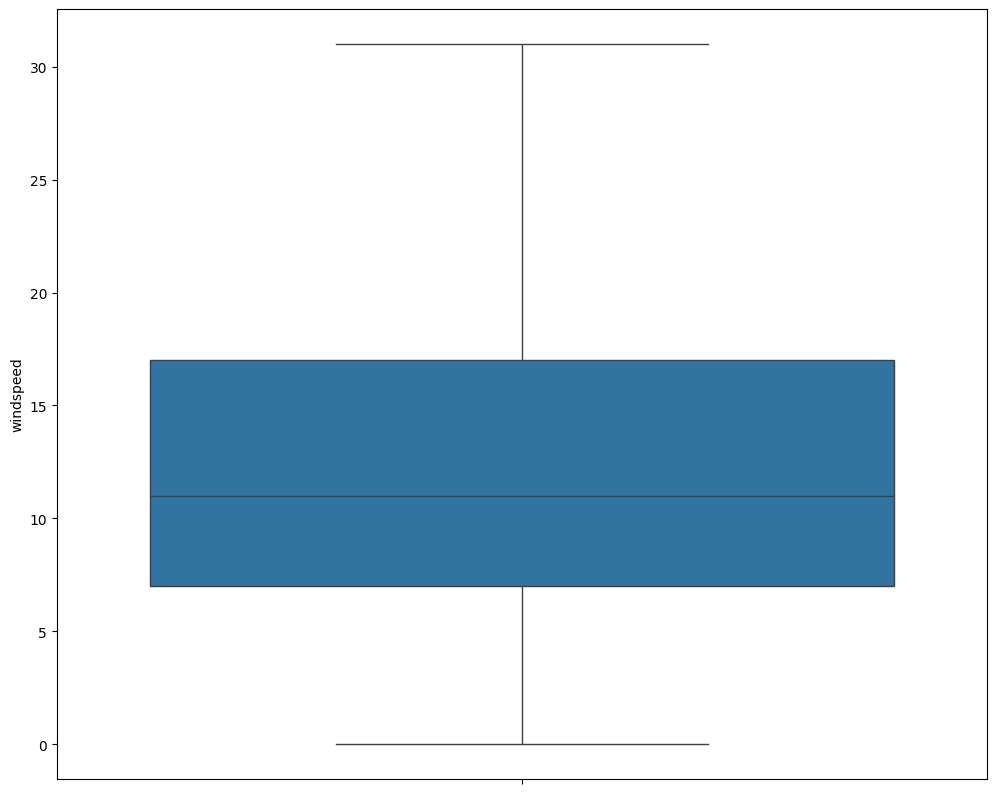

In [117]:
no_outliers_df = remove_outliers(df, 'windspeed')
plot_boxplot(no_outliers_df, ['windspeed'])

In [118]:
no_outliers_df.sample(20)

datetime  season  holiday  workingday  weather   temp  \
2412   2011-06-08 10:00:00       2        0           1        1  33.62   
4886   2011-11-16 16:00:00       4        0           1        3  19.68   
9748   2012-10-10 13:00:00       4        0           1        1  22.96   
2309   2011-06-04 03:00:00       2        0           0        1  21.32   
2791   2011-07-05 05:00:00       3        0           1        1  27.06   
4649   2011-11-06 19:00:00       4        0           0        1  15.58   
1968   2011-05-08 22:00:00       2        0           0        1  20.50   
461    2011-02-02 07:00:00       1        0           1        3   9.02   
6332   2012-03-01 02:00:00       1        0           1        2  18.86   
3602   2011-09-01 00:00:00       3        0           1        1  24.60   
4987   2011-12-01 21:00:00       4        0           1        1  12.30   
470    2011-02-02 16:00:00       1        0           1        1  14.76   
828    2011-02-17 23:00:00       1        0           1        1  18.86   
5981   2012-02-05 10:00:00       1        0           0        2  10.66   
10280  2012-11-13 18:00:00       4        0           1        1  13.94   
9932   2012-10-18 05:00:00       4        0           1        1  18.04   
8747   2012-08-06 20:00:00       3        0           1        1  31.16   
3127   2011-07-19 05:00:00       3        0           1        2  28.70   
1978   2011-05-09 08:00:00       2        0           1        1  21.32   
9246   2012-09-08 15:00:00       3        0           0        3  22.96   

        atemp  humidity  windspeed  count  
2412   37.120        43    15.0013     90  
4886   23.485        94     7.0015    123  
9748   26.515        49     0.0000    297  
2309   25.000        59     7.0015     18  
2791   31.060        69     0.0000     20  
4649   19.695        76    12.9980    151  
1968   24.240        88     6.0032    115  
461    10.605        93    15.0013     49  
6332   22.725        94    19.0012      6  
3602   28.790        78     7.0015     51  
4987   15.910        61     7.0015    162  
470    16.665        71    19.9995    103  
828    22.725        67    19.9995     44  
5981   12.120        65    19.0012    148  
10280  15.910        49    19.0012    559  
9932   21.970        82    15.0013     42  
8747   36.365        66    11.0014    457  
3127   33.335        74     7.0015     19  
1978   25.000        55    15.0013    374  
9246   26.515        88    16.9979    512

In [119]:
no_outliers_df = format_dates(no_outliers_df, 'datetime')
no_outliers_df.sample(20)

season  holiday  workingday  weather   temp   atemp  humidity  \
8389       3        0           1        2  26.24  28.790        83   
5195       4        0           0        1  13.94  15.150        34   
1325       2        0           1        3  10.66  12.880        93   
2921       3        0           0        1  34.44  37.120        39   
5372       4        0           0        1   8.20  10.605        75   
7788       2        0           1        1  23.78  27.275        49   
390        1        1           0        2   7.38   8.335        55   
9893       4        0           1        1  22.14  25.760        39   
8953       3        0           1        2  29.52  34.090        62   
7009       2        0           1        1  17.22  21.210        67   
9955       4        0           1        2  22.96  26.515        83   
3062       3        0           0        1  31.16  34.090        43   
584        1        0           1        2  13.12  17.425        62   
6883       2        0           1        1  17.22  21.210        41   
803        1        0           1        1  13.94  16.665        53   
2246       2        0           1        1  35.26  41.665        53   
8764       3        0           1        2  32.80  37.120        52   
5609       1        0           0        1  12.30  15.150        52   
7142       2        0           0        1  27.06  31.060        50   
8593       3        0           1        1  31.16  35.605        58   

      windspeed  count  month  day  hour  
8389     8.9981    139      7   10    22  
5195    27.9993    286     12   10    13  
1325    12.9980      7      4    1     2  
2921    19.0012    361      7   10    15  
5372    11.0014     80     12   17    22  
7788    16.9979    265      6    4    21  
390     16.9979     92      1   17    18  
9893    16.9979    308     10   16    14  
8953    12.9980    233      8   15    10  
7009    12.9980    319      4   10     9  
9955     0.0000      6     10   19     4  
3062    19.0012    463      7   16    12  
584      0.0000     66      2    7    12  
6883    19.9995      5      4    5     3  
803     12.9980     73      2   16    22  
2246     0.0000    169      6    1    12  
8764    12.9980    253      8    7    13  
5609    11.0014    126      1    8    20  
7142    26.0027     90      4   15    23  
8593    12.9980    198      7   19    10

<Axes: xlabel='temp', ylabel='count'>

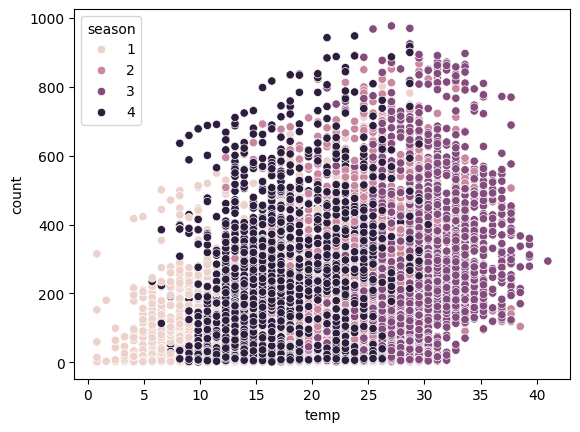

In [120]:
sns.scatterplot(data=no_outliers_df, x='temp', y='count', hue='season')

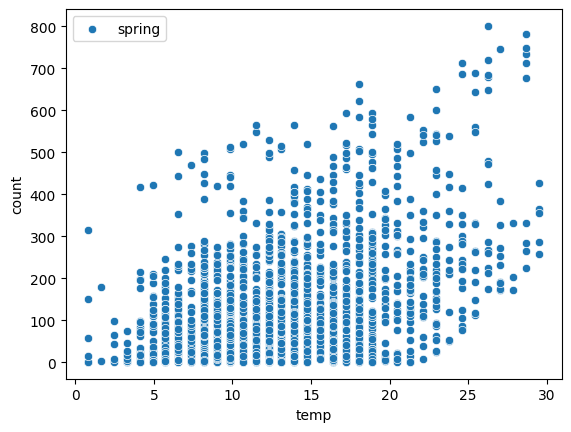

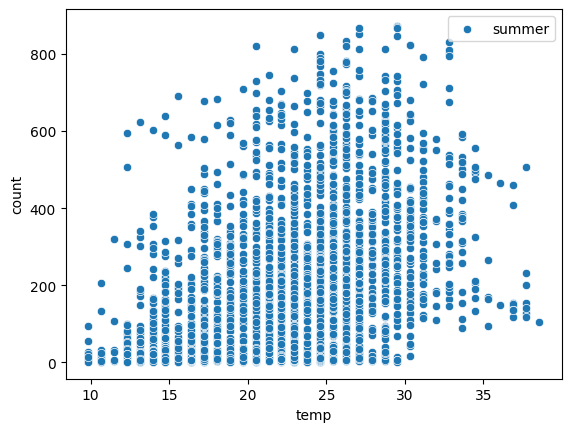

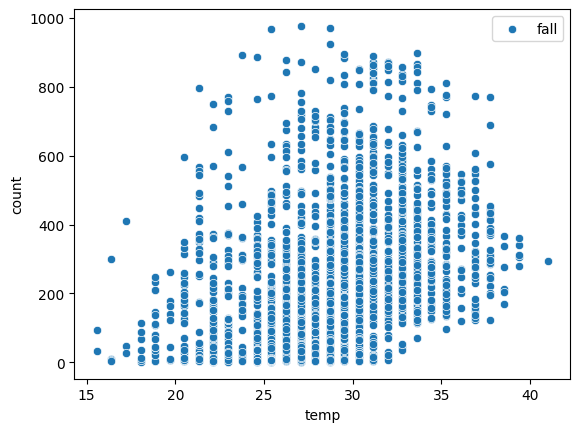

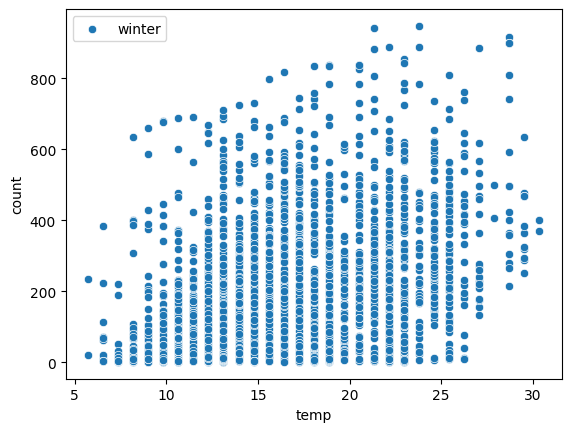

In [121]:
season_vals = no_outliers_df['season'].unique()
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
season_dict = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}


for season in season_vals:
    sns.scatterplot(data=no_outliers_df[no_outliers_df['season'] == season], x='temp', y='count', label=season_dict[season])
    plt.show()

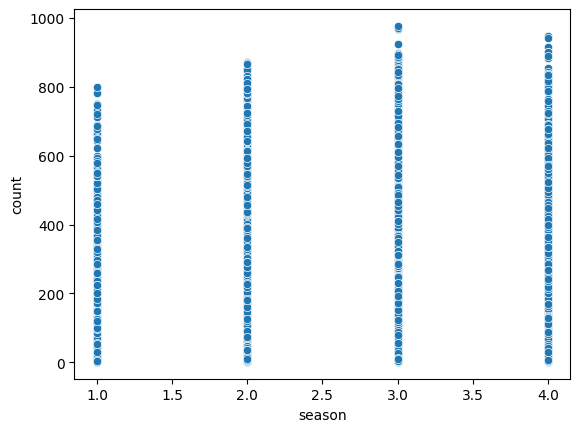

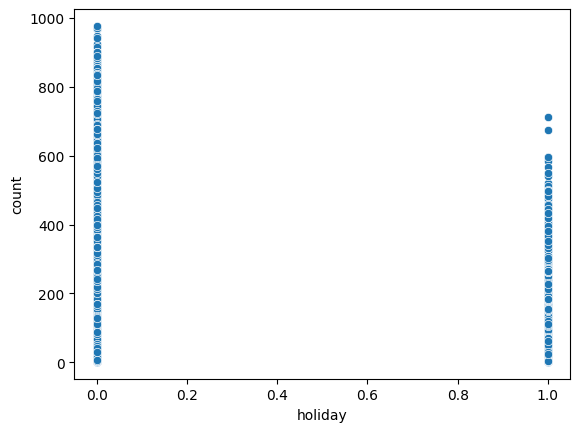

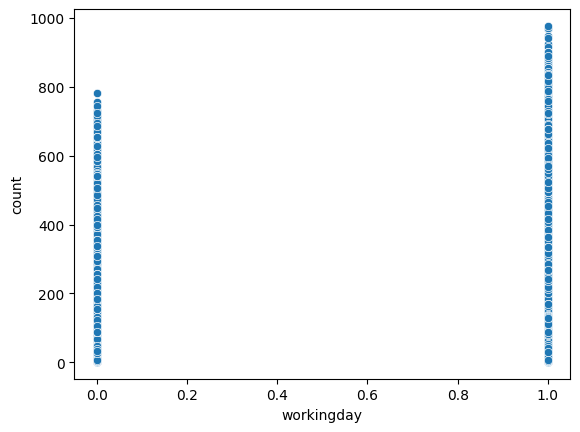

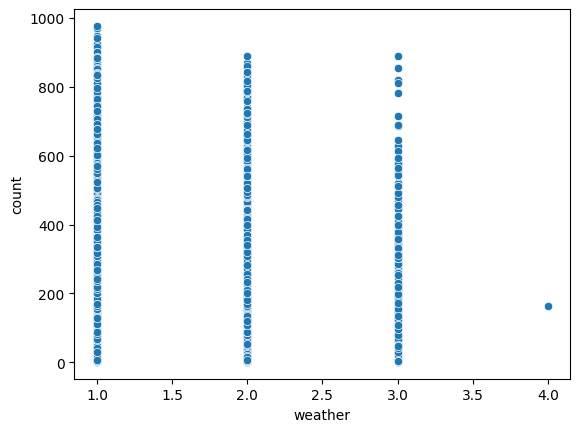

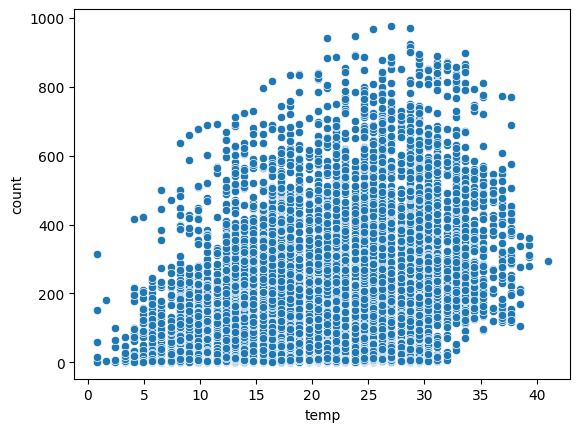

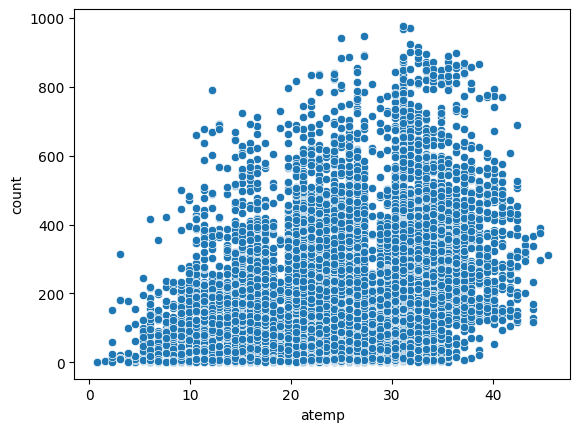

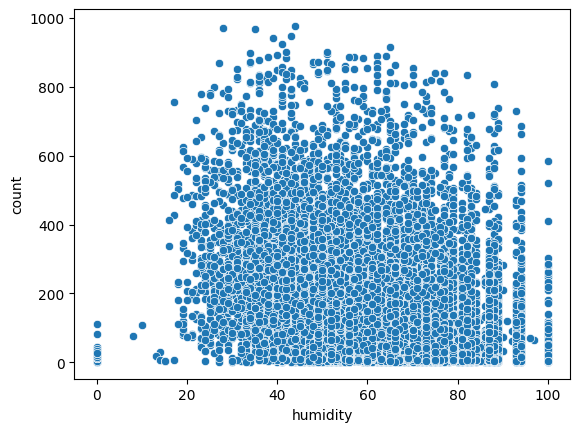

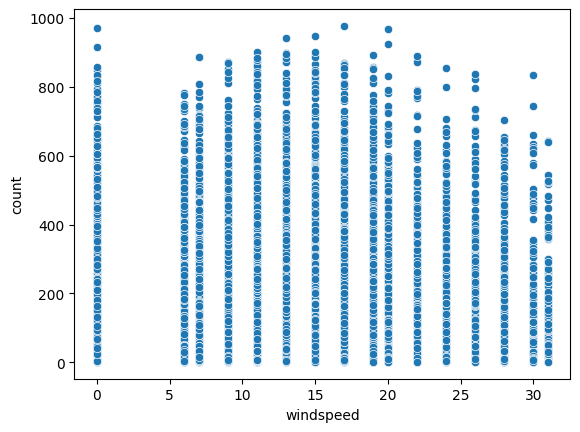

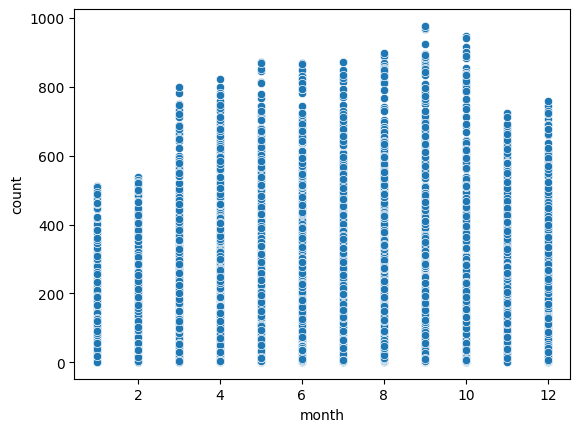

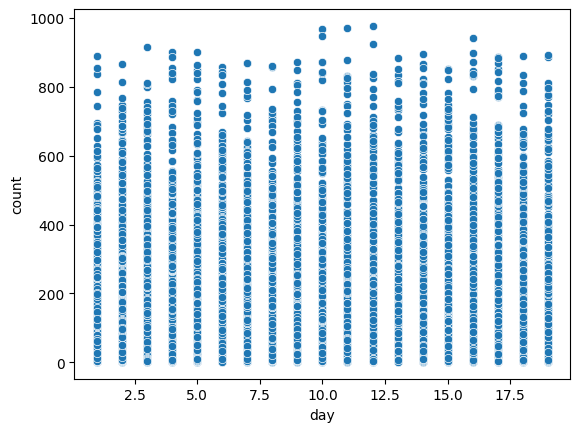

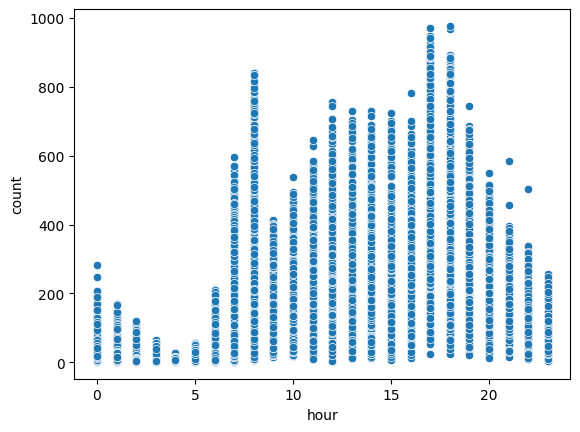

In [122]:
for col in no_outliers_df.columns:
    if col != 'count':
        sns.scatterplot(data=no_outliers_df, x=col, y='count')
        plt.show()

<Axes: >

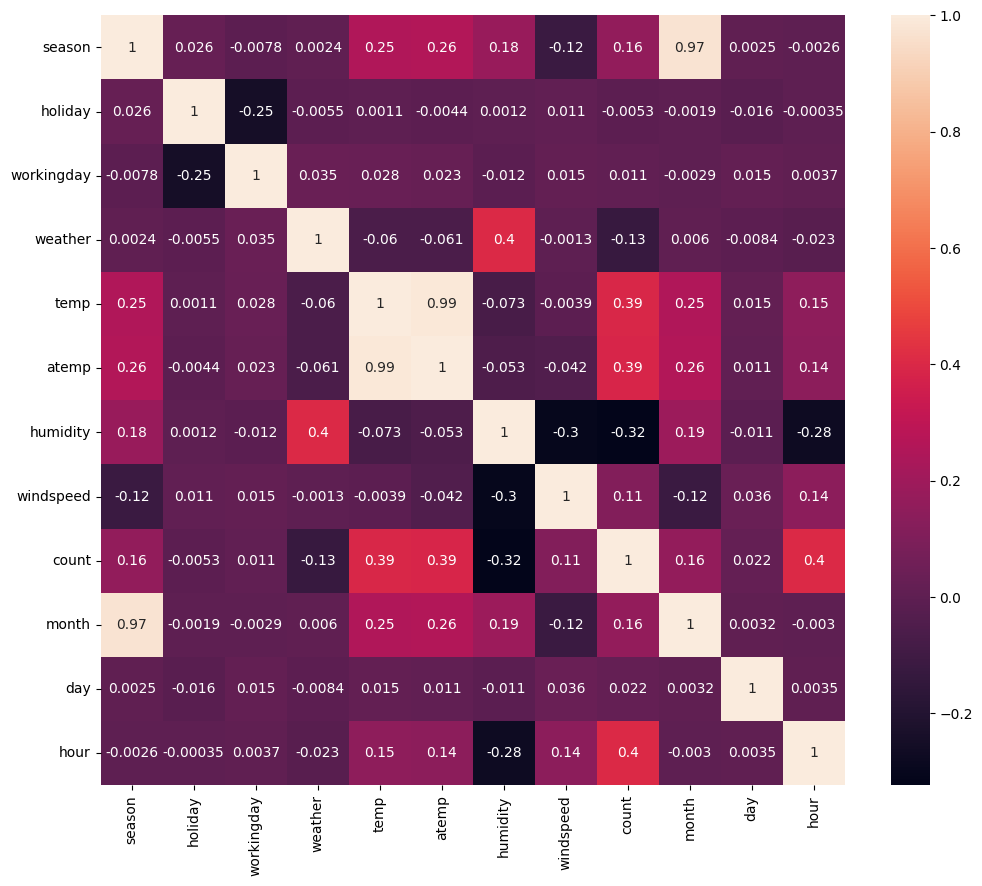

In [123]:
plt.figure(figsize=(12, 10))
sns.heatmap(no_outliers_df.corr(), annot=True)

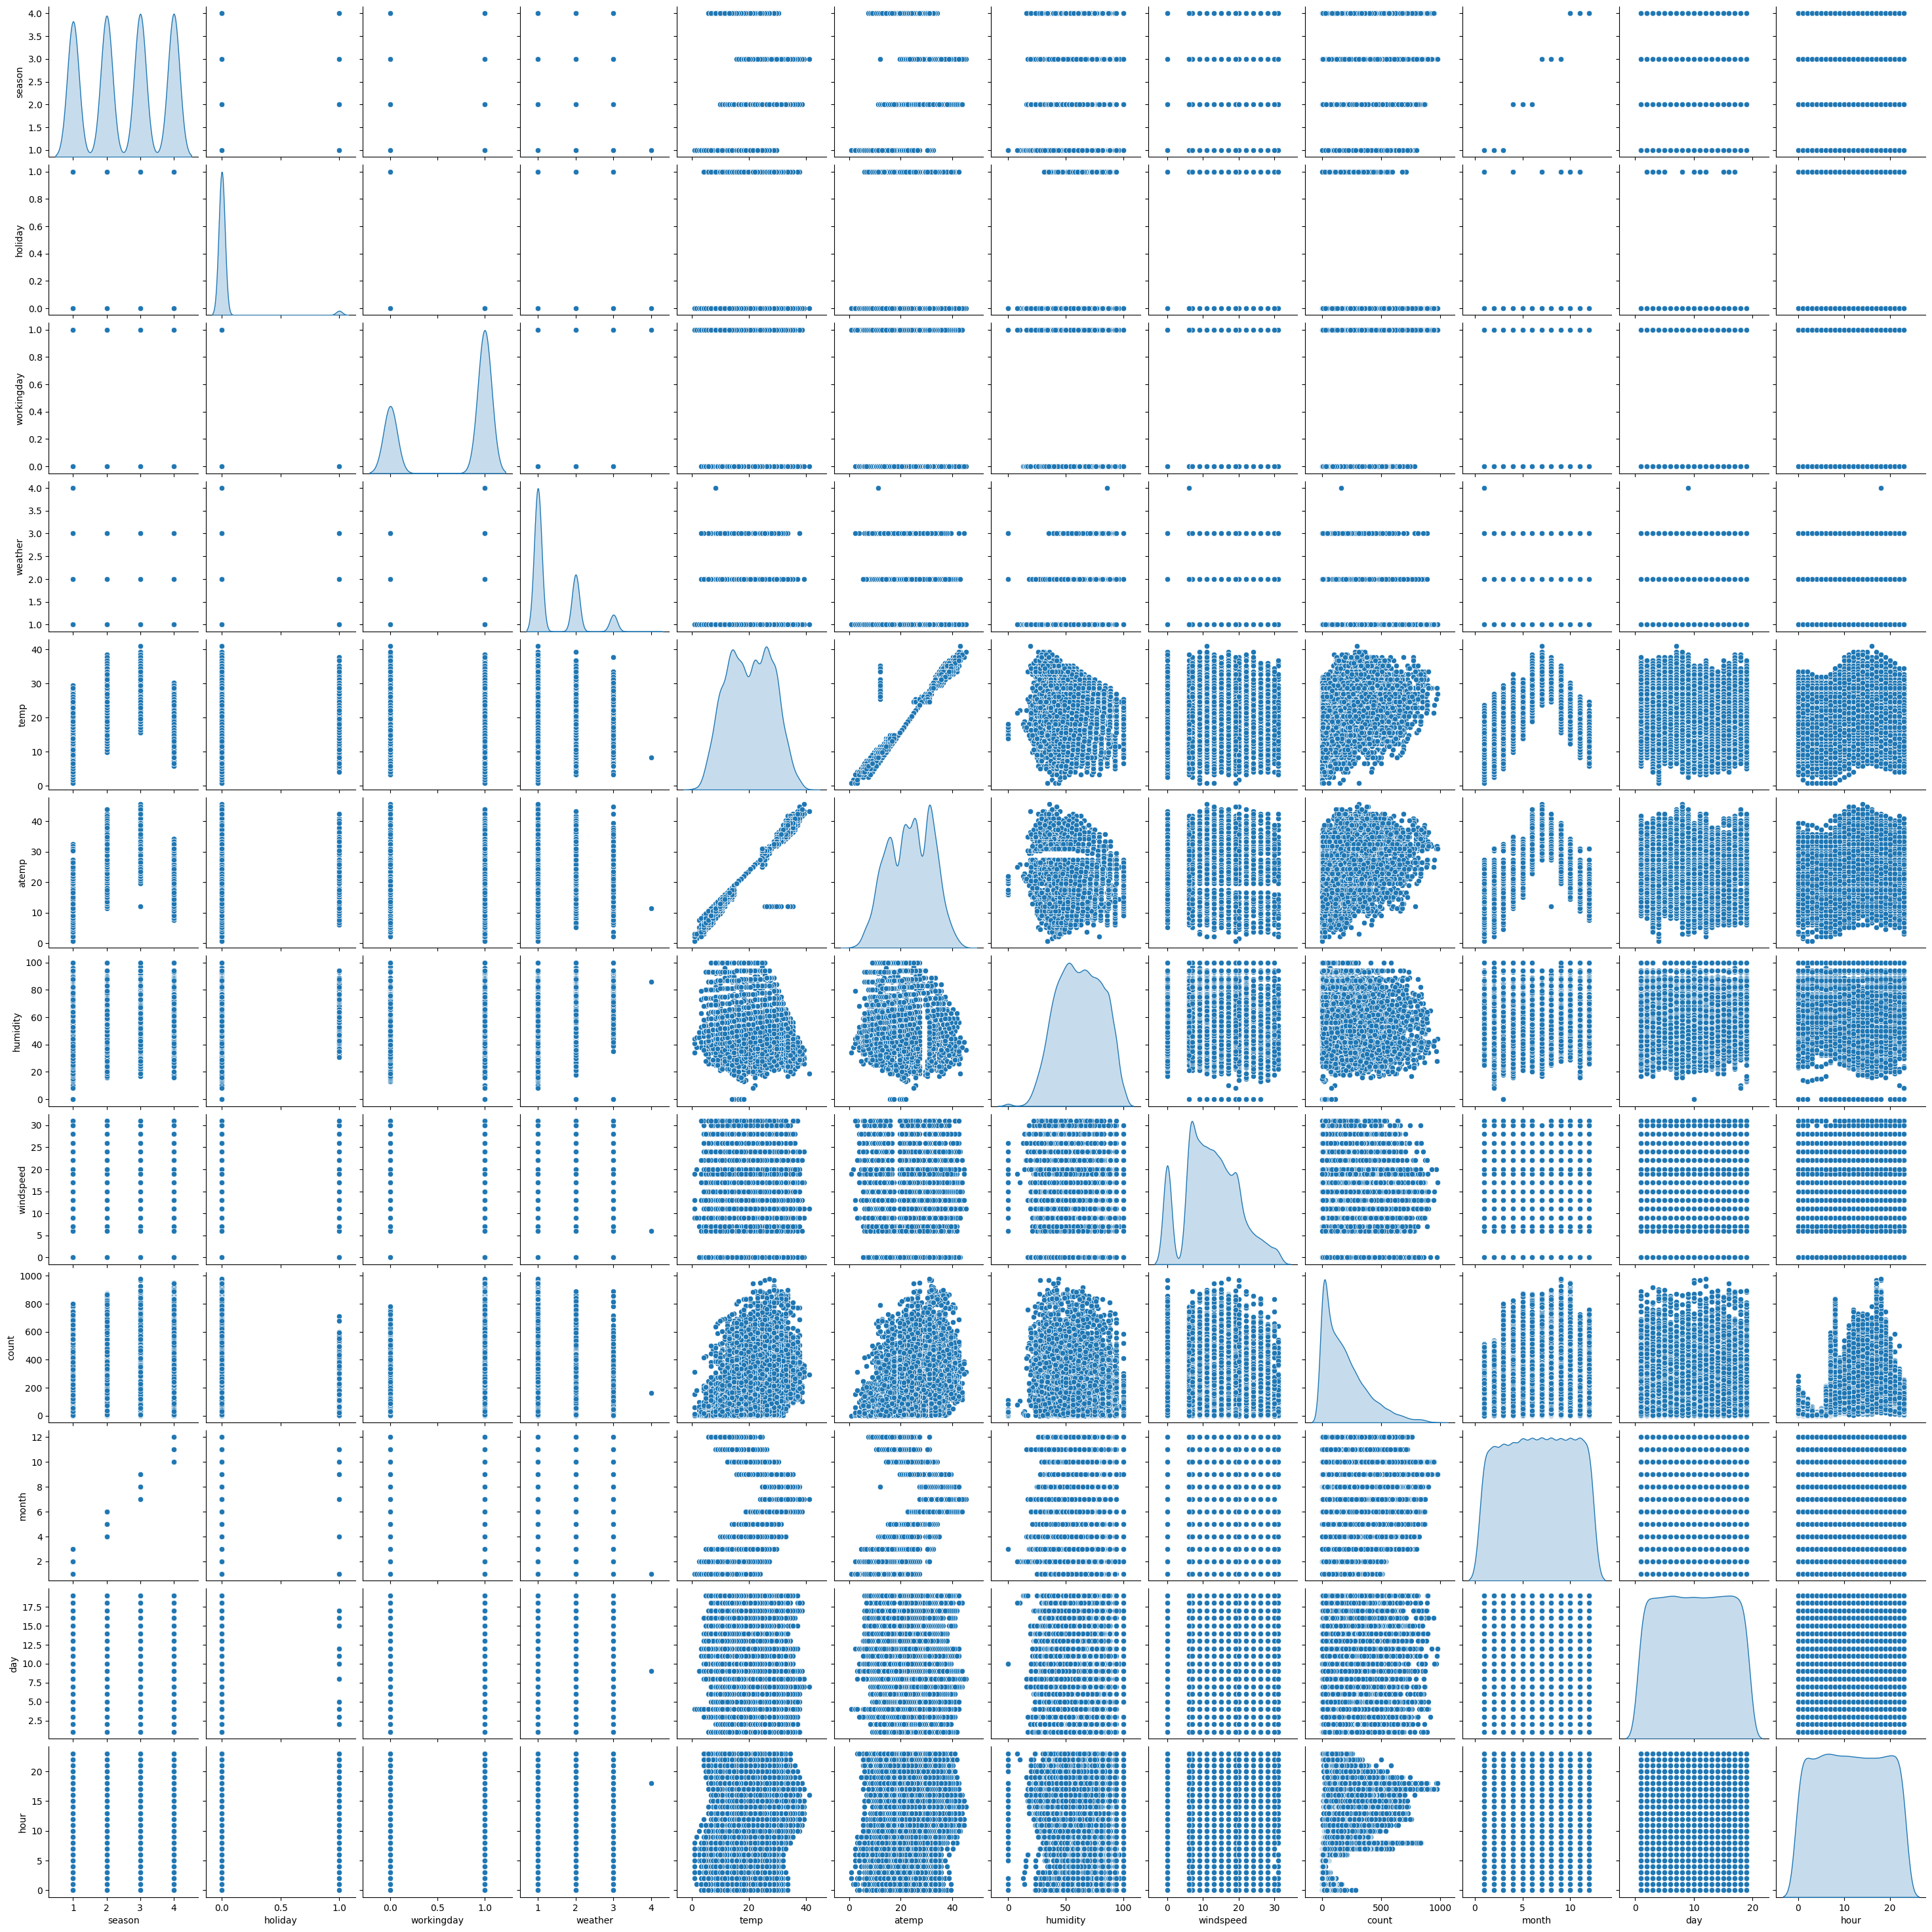

In [124]:
# check if the data is skewed
sns.pairplot(data=no_outliers_df, diag_kind='kde')

In [125]:
# normalize the data
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
normalized_df = no_outliers_df.copy(deep=True)
normalized_df[decimal_cols] = min_max_scaler.fit_transform(std_scaler.fit_transform(normalized_df[decimal_cols]))

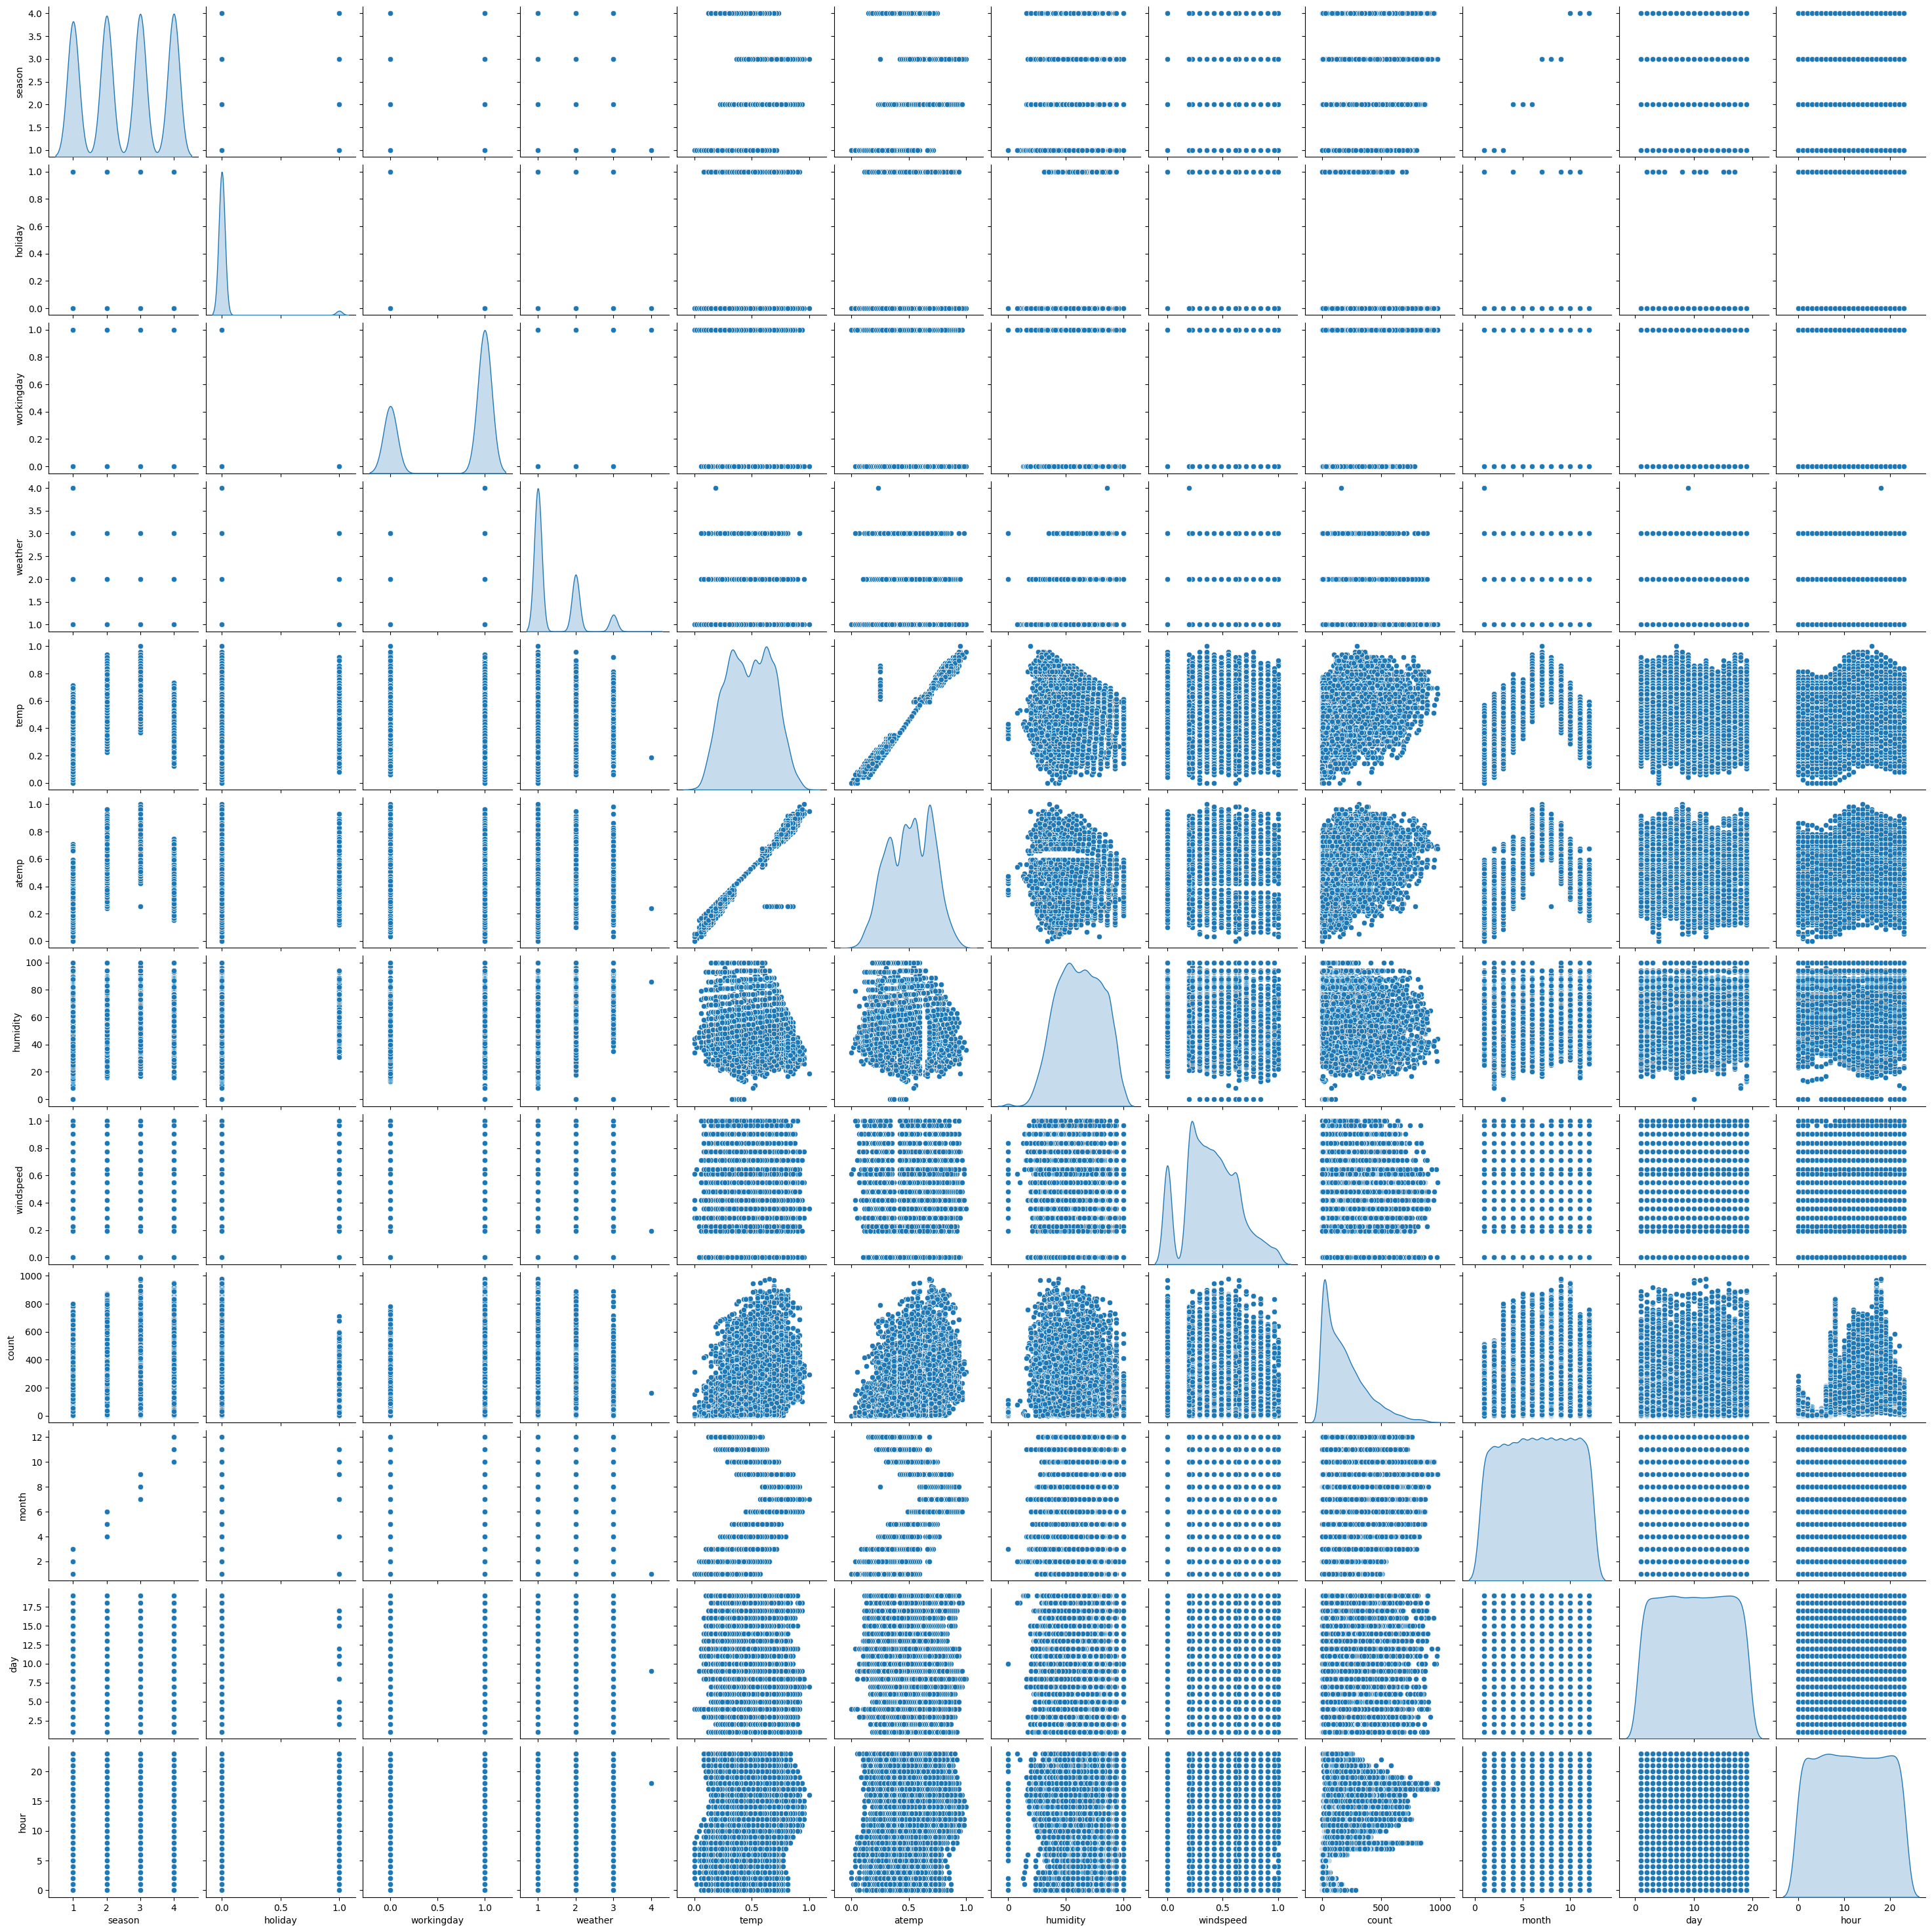

In [126]:
sns.pairplot(data=normalized_df, diag_kind='kde')

In [127]:
if not os.path.exists('./outputs'):
    os.makedirs('./outputs')

no_outliers_df.to_csv('./outputs/train_processed.csv', index=False)